# Homework 8 - Problems 13.8 Huterer

In [1]:
# import necessary modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from Helper_Functions_CLSSS import Get_LCDM_Cls

# for crisper plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.size']=11
plt.rcParams['text.usetex']=True
plt.rcParams['font.family']='stix'
plt.rcParams['figure.figsize']= (6.5,4)
plt.rcParams['figure.dpi']=150
plt.rcParams['axes.facecolor'] = 'white'

## Problem One - Huterer 13.8

### Generate the Angular Power Spectrum of the CMB temperature for the Lambda CDM (best fit) model, and for slightly modified models. Discuss the observed differences between them.

In [2]:
# Generate Cl's of LCDM model 
h=0.678; omega_cdm=0.1201; omega_b=0.0224; tau_reio=0.054; A_s=2.1e-9; n_s=0.966;
ll, clTT, clEE, clTE = Get_LCDM_Cls(h, omega_b, omega_cdm, tau_reio, A_s, n_s)

In [3]:
# Generate Cl's of Alternative Models 
h=0.678; omega_cdm=0.1201*1.1; omega_b=0.0224*1.1; tau_reio=0.054; A_s=2.1e-9; n_s=0.966;
ll, clTT_1, clEE, clTE = Get_LCDM_Cls(h, omega_b, omega_cdm, tau_reio, A_s, n_s)

h=0.678; omega_cdm=0.1201; omega_b=0.0224; tau_reio=0.054; A_s=2.1e-9; n_s=0.966;
ll, clTT_2, clEE, clTE = Get_LCDM_Cls(h, omega_b, omega_cdm, tau_reio, A_s, n_s*1.1)

h=0.678; omega_cdm=0.1201; omega_b=0.0224; tau_reio=0.054; A_s=2.1e-9; n_s=0.966;
ll, clTT_3, clEE, clTE = Get_LCDM_Cls(h, omega_b, omega_cdm, tau_reio, A_s*1.1, n_s)

h=0.678; omega_cdm=0.1201; omega_b=0.0224; tau_reio=0.054; A_s=2.1e-9; n_s=0.966;
ll, clTT_4, clEE, clTE = Get_LCDM_Cls(h, omega_b*1.1, omega_cdm, tau_reio, A_s, n_s)

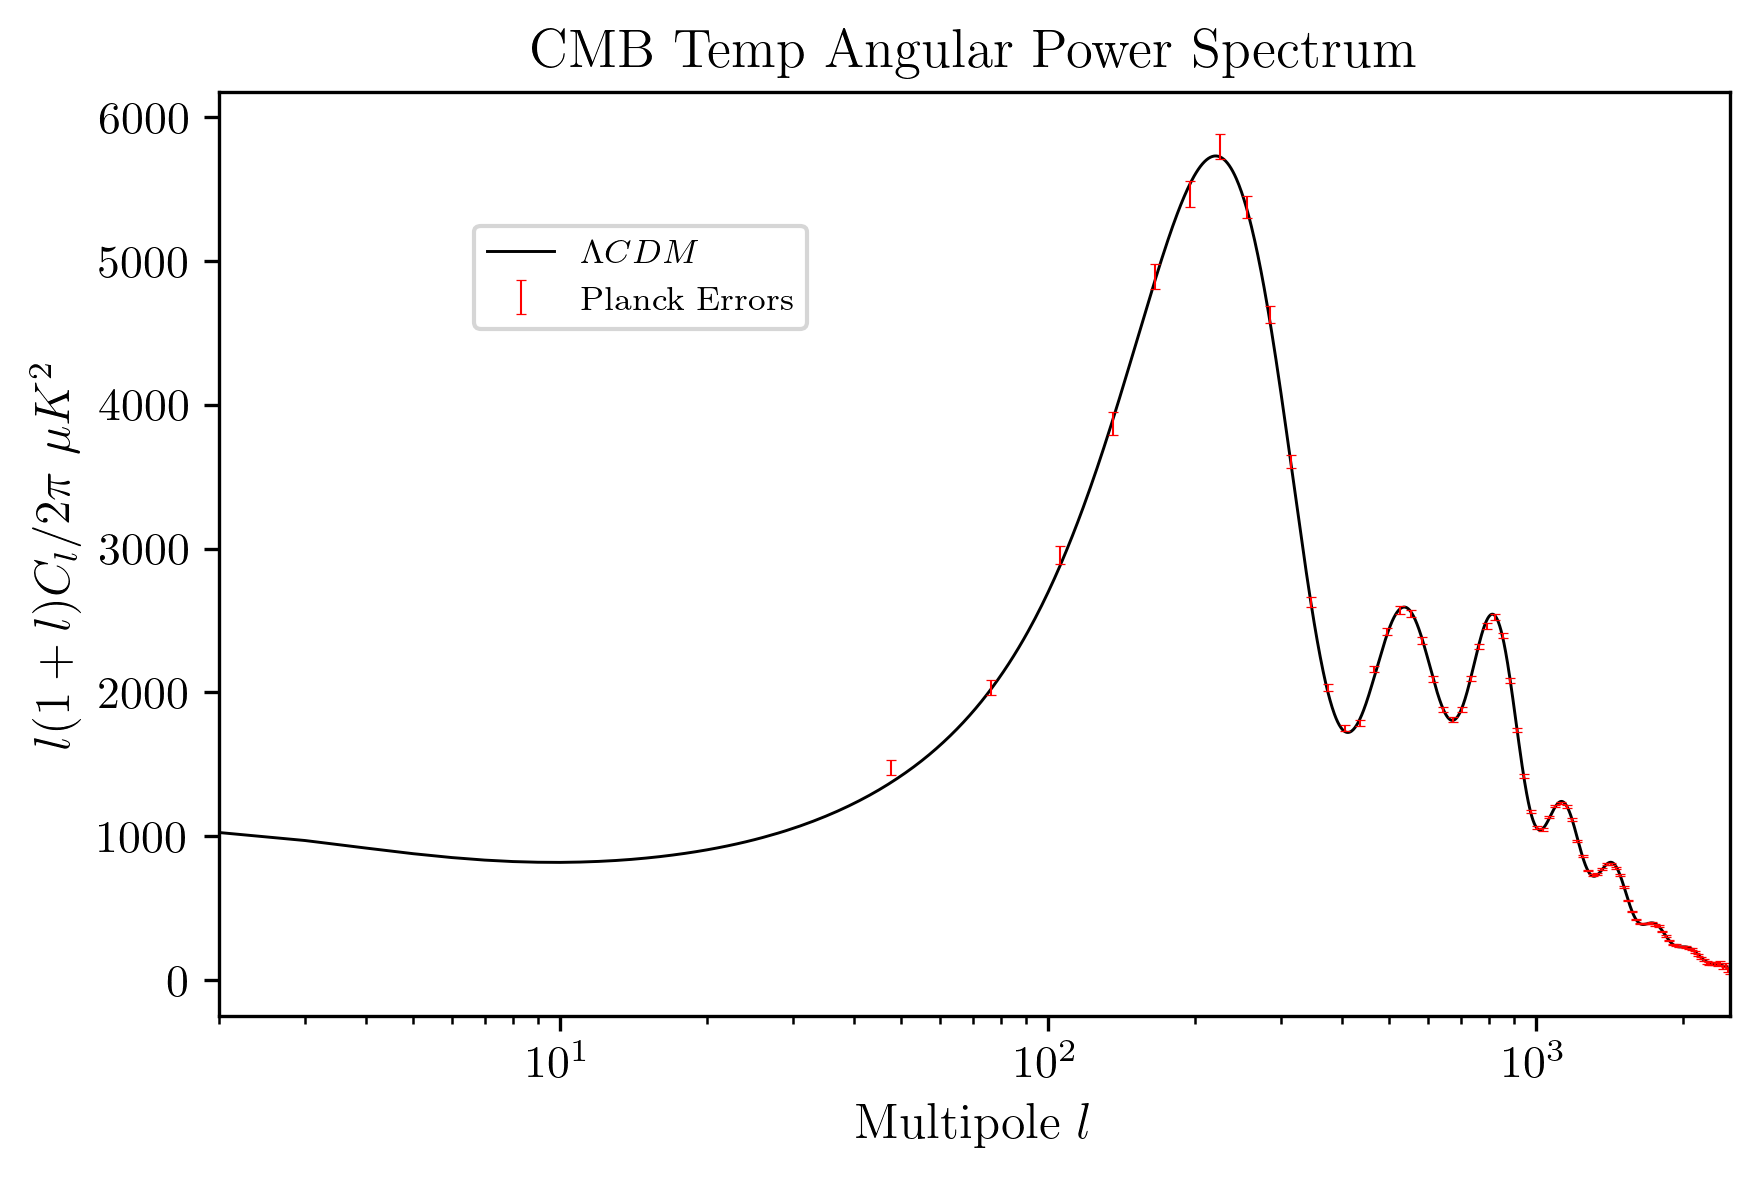

In [4]:
# Plot both Models
plt.plot(ll,(2.7255e6)**2*clTT  *(ll*(ll+1))/(2*np.pi), '-k', lw=0.7, label='$\Lambda CDM$')

#Load & Plot error bar data (just for fun)
errors = np.genfromtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')
l_errors = errors[:,0]
d_l = errors[:,1]
err = [errors[:,2],errors[:,3]]
plt.errorbar(l_errors, d_l, yerr=err, fmt='none', ecolor = 'r', elinewidth = 0.5, capsize = 1.2, capthick = 0.3, label='Planck Errors')

# Plot specifications
plt.xlim([2,2500])
plt.xscale('log')
plt.title('CMB Temp Angular Power Spectrum')
plt.xlabel(r'Multipole $l$',fontsize=12)
plt.ylabel(r'$l(1+l)C_l/2\pi$ $\mu K^2$',fontsize=12)
plt.legend(loc='right',fontsize=8, bbox_to_anchor=(0.4, 0.8))

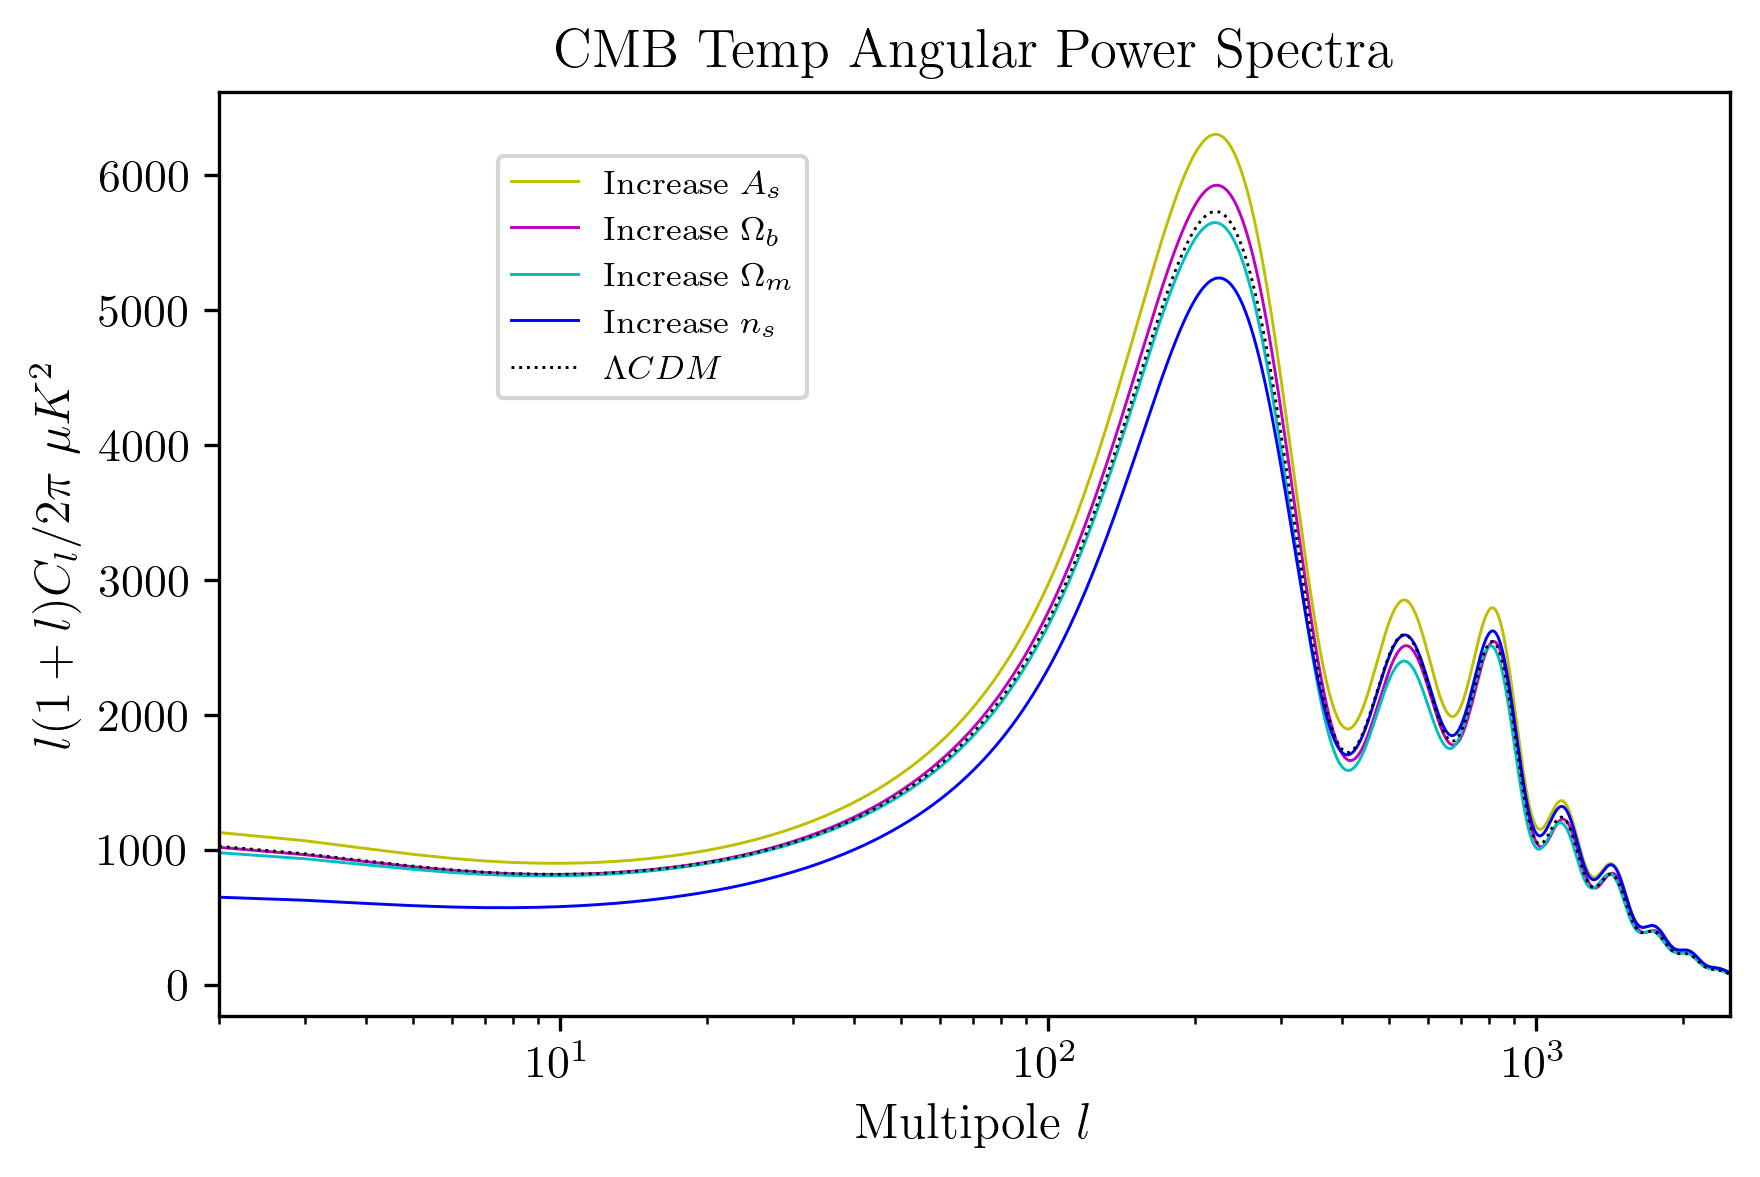

In [11]:
# Plot both Models
plt.plot(ll,(2.7255e6)**2*clTT_3*(ll*(ll+1))/(2*np.pi), 'y', lw=0.7, label='Increase $A_s$')
plt.plot(ll,(2.7255e6)**2*clTT_4*(ll*(ll+1))/(2*np.pi), 'm', lw=0.7, label='Increase $\Omega_b$')
plt.plot(ll,(2.7255e6)**2*clTT_1*(ll*(ll+1))/(2*np.pi), 'c', lw=0.7, label='Increase $\Omega_m$')
plt.plot(ll,(2.7255e6)**2*clTT_2*(ll*(ll+1))/(2*np.pi), 'b', lw=0.7, label='Increase $n_s$')
plt.plot(ll,(2.7255e6)**2*clTT  *(ll*(ll+1))/(2*np.pi), ':k', lw=0.7, label='$\Lambda CDM$')



# Plot specifications
plt.xlim([2,2500])
plt.xscale('log')
plt.title('CMB Temp Angular Power Spectra')
plt.xlabel(r'Multipole $l$',fontsize=12)
plt.ylabel(r'$l(1+l)C_l/2\pi$ $\mu K^2$',fontsize=12)
plt.legend(loc='right',fontsize=8, bbox_to_anchor=(0.4, 0.8))

### Above we see the four modified models, plotted against LCDM, and clearly they are all less favored by Planck data. Let's now discuss how each alters the standard model.

### Increasing $A_s$ by 10% increases the overall amplitude of the initial matter perturbations leftover by inflation, and thus sets "deeper" seeds for the CMB. As expected, this would increase the power of the CMB fluctations, as is apparent in the overall increased amplitude of the plot.

### Increasing $\Omega_b$ increases the baryonic matter in the CDM potential wells (i.e. the massess on the springs, in Wayne Hu's diagram). It makes sense that this would increase the power in the compression acoustic osscilations (first peak in particular), as we see.

### However, when you increase TOTAL matter, i.e. $\Omega_m$, you're also increasing the depth of the potential wells caused by the CDM. This seems to cancel the effect of increasing $\Omega_b$ alone on the BAO's. In fact, the power is somewhat supressed. I'm not sure why it is supressed on the first peak (compression) but it makes sense that the rarefaction peak is reduced since the plasma will have a harder time leaving deeper wells. 

### Lastly, increasing the spectral index means that, in the initial matter perturbations exiting inflation, the smaller scales (higher k's) exist at larger amplitudes and the larger scales (smaller k's) exist at smaller ampltidues. This sets the seeds for the CMB structure, and indeed you see that shift in power (especially down at small k's) in the amplitude of the Cl's.